<a href="https://colab.research.google.com/github/driesvdv/2021-web-and-mobile-project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project data science

# imports


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [169]:
# Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# algemene functies

In [170]:
def geef_procent_na (dataframe) :
  return dataframe.isna().mean().round(4) * 100

# Data inlezen

In [171]:
# klanten = pd.read_csv('klanten.csv', sep=';')
# bestellingen = pd.read_csv('bestellingen.csv', sep=';')
# deelnemers = pd.read_csv('deelnemers.csv', sep=';')
# artikels = pd.read_csv('artikels.csv', sep=';')

klanten = pd.read_csv('drive/MyDrive/DataScienceData/klanten.csv', sep=';')
bestellingen = pd.read_csv('drive/MyDrive/DataScienceData/bestellingen.csv', sep=';')
deelnemers = pd.read_csv('drive/MyDrive/DataScienceData/deelnemers.csv', sep=';')
artikels = pd.read_csv('drive/MyDrive/DataScienceData/artikels.csv', sep=';')

# Deel 1 van het project

# data bekijken

In [172]:
display(klanten.head(10))
display(geef_procent_na(klanten))

,Familienaam,Voornaam,Straat + nr.,Telefoon,Klantnummer,Klantnummer CMS,Email,Creatie datum,Geb. datum,Locatie,Postcode,Land
0,af5f4e99f49c3f2d,NaN,bf1214d7a75f568b,NaN,ac983a70783ec68a,NaN,35e138f5766138d6,16.04.2020,NaN,Aalst,9300,Belgium
1,daf9045a1aa9fb22,NaN,26c7b330542add8d,NaN,a2c2445dfea02d1c,NaN,1bb9bb31cb0ff43f,02.02.2014,NaN,SCHRIEK,2223,Belgium
2,613157e82ec0becf,NaN,04f2b3bf06a51ba9,be1d583e5a741a27,2793b2960986ce2e,NaN,61cd238810eed07e,30.12.2011,NaN,Tilburg,5045 SR,Nederland
3,c01004eb9480c797,NaN,6933729beecae423,4517f4473a5a46a1,438097f68bf1969f,NaN,c3c31caf3f29a6e3,19.03.2012,NaN,de Bilt,3731 CG,Nederland
4,0b854cdcc8fcd3be,NaN,3b1ec6e6b4b88284,NaN,ec6e4fa0caea4e51,NaN,92b53e5857fcfa8c,14.02.2012,NaN,Hilversum,1223 HM,Nederland
5,8860548be62aac71,NaN,029cd2af8e95f1f2,NaN,38269946bd6bc6f1,NaN,NaN,15.07.2014,NaN,Merselo,5815 EA,Nederland
6,2475d173bac739f3,NaN,b1bc04ae55a3c08a,NaN,6c231fcb70c72e00,NaN,65a429d4050e8ca7,06.08.2018,NaN,Den Haag,2548 HP,Nederland
7,45e685f7928d041f,NaN,f1f076cb3e3e734c,8732065fe6272b80,f70addd191c2c2c6,NaN,6afba6a6f155da89,01.08.2014,01.09.1982,HERENT,3020,Belgium
8,23adb15f8199606b,NaN,b31235f5df60b851,2afa5a00b8710764,571ab32d5645da0c,NaN,5d3415b068c2bed2,03.02.2012,NaN,KONTICH,2550,Belgium
9,9e6078a0ad294af2,NaN,eeaca889acf5357f,c6beeede33941f13,ef67a2a0fed6d105,NaN,7883af691ad974fd,06.06.2012,NaN,Schiedam,3117 WT,Nederland


Familienaam         0.15
Voornaam            1.18
Straat + nr.        0.97
Telefoon           37.75
Klantnummer         0.00
Klantnummer CMS    38.96
Email               1.03
Creatie datum      43.52
Geb. datum         59.50
Locatie             0.94
Postcode            1.12
Land                0.06
dtype: float64

In [173]:
bestellingen.head(10)

,Status,Dos. jaar,Dos. nr.,Email,Klantnummer,Klantnummer CMS,Datum creatie,D. vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Touroperator,Land klant,Bestemming,Regio,Reistype,# pass.,Pakket Code,Gefactureerd
0,-1,2021,0,0d484d11bfafa789,e7a25456cafdac84,NaN,04.01.2021 15:11:00,11.09.2021,18.09.2021,0,0,0,c723acdbab5e366e,nl,Spanje,NaN,NaN,1.0,ESOVFIHEXP,False
1,0,2011,1,36710cc356dbbc5f,756abea9c3e90efe,NaN,28.01.2011 15:01:35,10.07.2011,17.07.2011,"14,52","14,52",0,NaN,Belgium,Netherlands,NaN,NaN,1.0,NaN,True
2,0,2011,3,37459dca4934080f,cc44932a4b289e81,NaN,07.04.2011 10:17:02,13.05.2011,15.05.2011,620,620,0,dbaa85d88e7fdc52,Netherlands,Belgium,NaN,Autovakantie Europa,2.0,NaN,False
3,0,2011,4,fe82fc76bd814dcf,17a916e5222e39a0,NaN,08.04.2011 15:02:33,22.05.2011,28.05.2011,1620,1620,0,e11db4bae17e4d63,Nederland,Spain,NaN,NaN,0.0,NaN,False
4,0,2011,9,7418f4b177e773ac,94bc0881cd24a1b5,NaN,27.04.2011 15:01:28,08.05.2011,15.05.2011,5040,5040,0,NaN,Netherlands,Botswana,NaN,Safari,2.0,NaN,False
5,0,2011,10,183e65845c332062,88f48bf74d1558fe,NaN,02.05.2011 14:32:39,15.05.2011,21.05.2011,2549,2549,0,62e4f54848e573da,Belgium,Portugal,NaN,NaN,2.0,NaN,True
6,0,2011,11,407fa7630f7e9610,14fa899cbefcd9ec,NaN,02.05.2011 15:40:50,16.07.2011,22.07.2011,540,540,0,3124a9d2236ff8eb,Netherlands,Netherlands,NaN,NaN,2.0,NaN,True
7,0,2011,13,8234f4b00d0881f8,5c09ae179c7894ca,NaN,03.05.2011 15:40:50,30.07.2011,13.08.2011,"2510,96","2510,96",0,1e80893643ca75c5,Belgium,Frankrijk Bourgogne,NaN,NaN,2.0,NaN,True
8,0,2011,14,9ff1e7188b97aec6,9074500e4eac155e,NaN,05.05.2011 12:15:57,25.07.2011,27.07.2011,"326,95","326,95",0,8860548be62aac71,Belgium,Ardennen,NaN,NaN,1.0,NaN,True
9,0,2011,16,2a0d57acd2aef852,d97137d8a5312916,NaN,06.05.2011 11:33:28,07.10.2011,17.10.2011,"11400,94","11400,94",0,b8260d721d5022a8,Netherlands,Zuid Afrika,NaN,Safari,3.0,NaN,False


In [174]:
deelnemers.head()

,Dossier,Vertrekdatum,Familienaam,Voornaam,Bestemming,Geboortedatum,Email,GSM,Straat + nr.,Postcode,Stad
0,1,10.07.2011,8baed0e75af3232d,c2c28b8191264b81,Netherlands,24.08.1999,NaN,NaN,4b92389579f601fc,9860,OOSTERZELE
1,2,15.07.2011,9777be93b58da2ca,f8e9215bbc7296b9,"Montpellier, Frankrijk",20.01.1995,NaN,NaN,f2dbf8a2b910a1fd,1980,ZEMST
2,2,15.07.2011,9777be93b58da2ca,646c285fa7f1d7ea,"Montpellier, Frankrijk",10.07.1999,NaN,NaN,f2dbf8a2b910a1fd,1980,ZEMST
3,3,13.05.2011,c700680d4f35e3ea,4ace97940ae28c9e,Belgium,28.05.1961,NaN,NaN,NaN,NaN,NaN
4,3,13.05.2011,fb6bf5a6ecbd3c14,c8aad0434684dfd6,Belgium,06.03.1960,37459dca4934080f,NaN,15bc118e90a6d83a,5398CA,Maren-Kessel


In [175]:
artikels.head()

,Dos. nr.,DossierStatus,Boekingsdatum,Vertrekdatum,Volledige naam klant,Bestemming,ArticlePoNummer,Artikelcode,Omschrijving,Artikelprijs,Totaal dossier
0,713,Ok,10.01.2013 00:00:00,19.07.2013 00:00:00,826f2a57235cbff0,Buitenritten in de Ongerepte Natuur van de Loo...,NaN,NaN,Prijs per persoon (2 x Tweepersoonskamer),"880,00","0,00"
1,714,Ok,11.01.2013 00:00:00,26.04.2013 00:00:00,372cf782d12d6ebb,Westernranch in de Ardennen,NaN,ec5bf082c4d8bae6,Weekend Western Ranch in tweepersoonskamer,"580,00","580,00"
2,744,Ok,26.01.2013 00:00:00,27.04.2013 00:00:00,b656deada70fafb9,"Fatima-trektocht in Spanje, met bezoek Granada...",NaN,NaN,Prijs per persoon (2 x Tweepersoonskamer),"5.400,00","5.727,00"
3,744,Ok,26.01.2013 00:00:00,27.04.2013 00:00:00,b656deada70fafb9,"Fatima-trektocht in Spanje, met bezoek Granada...",NaN,NaN,Ja,"327,00","5.727,00"
4,745,Ok,27.01.2013 00:00:00,07.04.2013 00:00:00,52aa0c8f23c08919,Klassieke dressuurlessen van topkwaliteit en s...,NaN,NaN,Prijs per persoon (1 x Eenpersoonskamer),"1.280,00","1.280,00"


# klanten data

Zelfde waarden met verschillende notatie opkuisen.

In [176]:
#alles lowercase maken om hoofletterongevoelig te werken
klanten['Land'] = klanten['Land'].str.lower()
#corrupte data weglaten voor filteren
klanten = klanten.loc[(klanten.Land.notna()) & (~klanten.Land.str.contains(('selecteer|test|kies|jelle|0'), na=False))]

#varianten eenzelfde land gelijk maken
klanten.Land.loc[klanten.Land.str.startswith(('n'))] = "nederland"
klanten.Land.loc[klanten.Land.str.contains(('holland|utrecht|groningen|netherlands|hengelo'))] = "nederland"

klanten.Land.loc[klanten.Land.str.startswith(('be'))] = "belgië"
klanten.Land.loc[klanten.Land.str.contains(('belg|vlaanderen'))] = "belgië"

klanten.Land.loc[klanten.Land.str.contains(('fra'))] = "frankrijk"

klanten.Land.loc[klanten.Land.str.contains(('united kingdom|groot-brittanie'))] = "groot-brittanie"

klanten.Land.loc[klanten.Land.str.contains(('germany'))] = "duitsland"

#corrupte data weg laten zoals -, --, 27,.. na het aanpassen van landnamen
klanten = klanten.loc[klanten.Land.str.len() > 3]

Rijen met dezelfde voornaam, familienaam, postcode en land worden weggelaten. Er wordt geen gebruik gemaakt van de andere zaken omda die ofwel minder vaak ingevuld zijn zoals in de eerste onderstaande tabel te zien of omdat er meer kans is op typfouten.

In [177]:
klanten.drop_duplicates(subset=['Familienaam', 'Voornaam', 'Postcode', 'Land'], inplace=True)

# unieke waarden voor land oplijsten
klanten['Land'].unique()
klanten.reset_index(inplace=True) # enkel bij uitvoeren bij uitvoeren vanaf begin
klanten.info()
# geef_procent_na(klanten)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            3280 non-null   int64 
 1   Familienaam      3276 non-null   object
 2   Voornaam         3242 non-null   object
 3   Straat + nr.     3250 non-null   object
 4   Telefoon         2044 non-null   object
 5   Klantnummer      3280 non-null   object
 6   Klantnummer CMS  1997 non-null   object
 7   Email            3249 non-null   object
 8   Creatie datum    1852 non-null   object
 9   Geb. datum       1334 non-null   object
 10  Locatie          3251 non-null   object
 11  Postcode         3245 non-null   object
 12  Land             3280 non-null   object
dtypes: int64(1), object(12)
memory usage: 333.2+ KB


## overzicht aantal klanten per land

,Land,count
1,canada,1
2,chile,1
6,hong kong,1
8,luxemburg,1
10,oostenrijk,1
11,portugal,1
12,scotland,1
13,spanje,1
14,suriname,1
5,groot-brittanie,2


Text(0.5, 1.0, 'Klanten per land')

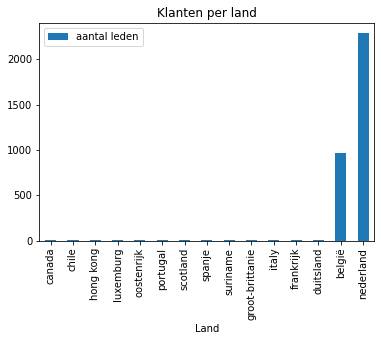

In [178]:
#resultaat weergeven van opkuisen landen
grouped = klanten.groupby(['Land'])['Land'].count().reset_index(name='count').sort_values(['count'])
display(grouped)
# display(klanten.tail())

grouped.plot.bar(x='Land', y='count')
plt.legend(['aantal leden'])
plt.title('Klanten per land')

# bestellingen data

In [179]:
bestellingen.head()
# bestellingen.info()

,Status,Dos. jaar,Dos. nr.,Email,Klantnummer,Klantnummer CMS,Datum creatie,D. vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Touroperator,Land klant,Bestemming,Regio,Reistype,# pass.,Pakket Code,Gefactureerd
0,-1,2021,0,0d484d11bfafa789,e7a25456cafdac84,NaN,04.01.2021 15:11:00,11.09.2021,18.09.2021,0,0,0,c723acdbab5e366e,nl,Spanje,NaN,NaN,1.0,ESOVFIHEXP,False
1,0,2011,1,36710cc356dbbc5f,756abea9c3e90efe,NaN,28.01.2011 15:01:35,10.07.2011,17.07.2011,"14,52","14,52",0,NaN,Belgium,Netherlands,NaN,NaN,1.0,NaN,True
2,0,2011,3,37459dca4934080f,cc44932a4b289e81,NaN,07.04.2011 10:17:02,13.05.2011,15.05.2011,620,620,0,dbaa85d88e7fdc52,Netherlands,Belgium,NaN,Autovakantie Europa,2.0,NaN,False
3,0,2011,4,fe82fc76bd814dcf,17a916e5222e39a0,NaN,08.04.2011 15:02:33,22.05.2011,28.05.2011,1620,1620,0,e11db4bae17e4d63,Nederland,Spain,NaN,NaN,0.0,NaN,False
4,0,2011,9,7418f4b177e773ac,94bc0881cd24a1b5,NaN,27.04.2011 15:01:28,08.05.2011,15.05.2011,5040,5040,0,NaN,Netherlands,Botswana,NaN,Safari,2.0,NaN,False


Bestellingen die geannuleerd zijn verwijderen

In [180]:
besetllingen = bestellingen.loc[bestellingen.Status == 0]

Regio is nooit ingevuld, reistype, pakket code en klantennummer zijn ook heel vaak niet ingevuld

In [181]:
#bestellingen.Bestemming.unique()

bestellingen.loc[:,"Pakket Code"].unique()
bestellingen["Datum creatie"] = bestellingen["Datum creatie"].astype('datetime64[ns]')
bestellingen["D. vertrek"] = bestellingen["D. vertrek"].astype('datetime64[ns]')
bestellingen["Datum terug"] = pd.to_datetime(bestellingen["Datum terug"], errors='coerce')

geef_procent_na(bestellingen)
bestellingen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4428 entries, 0 to 4427
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Status              4428 non-null   int64         
 1   Dos. jaar           4428 non-null   int64         
 2   Dos. nr.            4428 non-null   int64         
 3   Email               4371 non-null   object        
 4   Klantnummer         4425 non-null   object        
 5   Klantnummer CMS     2558 non-null   object        
 6   Datum creatie       4428 non-null   datetime64[ns]
 7   D. vertrek          4391 non-null   datetime64[ns]
 8   Datum terug         4386 non-null   datetime64[ns]
 9   Totaalprijs         4428 non-null   object        
 10  Betalingen dossier  4428 non-null   object        
 11  Openstaand dossier  4428 non-null   object        
 12  Touroperator        4329 non-null   object        
 13  Land klant          4407 non-null   object      

Er zijn negatieve reisduren aanwezig. Hierbij lijkt het waarschijnlijk dat de start en eind datum omgedraaid is. Een maximum van 4301 dagen lijkt ook niet correct te zijn.
Daarom worden alle reisduren absoluut gemaakt en wordt het maximum aantal dagen 100.
Voor de dagen tussen boeking en vertrek wordt er enen limiet geplaatst van 1500 dagen en word ook steeds de absolute waarde gebruikt.

In [182]:
bestellingen["reisduur"] = bestellingen["Datum terug"] - bestellingen["D. vertrek"]
bestellingen["dagen_tussen_boeking_en_vertrek"] = bestellingen["D. vertrek"] - bestellingen["Datum creatie"]
bestellingen.describe()

,Status,Dos. jaar,Dos. nr.,Regio,# pass.,reisduur,dagen_tussen_boeking_en_vertrek
count,4428.000000,4428.000000,4.428000e+03,0.0,4425.000000,4386,4391
mean,-0.031391,2016.023261,4.006100e+06,NaN,1.704859,14 days 11:31:26.183310533,74 days 09:00:42.735140068
std,0.174392,2.628432,8.052052e+06,NaN,1.216648,168 days 12:47:11.919090422,172 days 18:45:48.732003250
min,-1.000000,2011.000000,0.000000e+00,NaN,0.000000,-333 days +00:00:00,-4213 days +08:39:23
25%,0.000000,2014.000000,1.467750e+03,NaN,1.000000,-22 days +00:00:00,7 days 08:36:16
50%,0.000000,2016.000000,2.631500e+03,NaN,1.000000,6 days 00:00:00,68 days 07:21:15
75%,0.000000,2018.000000,3.815250e+03,NaN,2.000000,59 days 00:00:00,153 days 00:00:00
max,0.000000,2021.000000,2.021007e+07,NaN,15.000000,4301 days 00:00:00,780 days 13:14:28


In [183]:
bestellingen.reisduur = bestellingen.reisduur.abs()
bestellingen.dagen_tussen_boeking_en_vertrek = bestellingen.dagen_tussen_boeking_en_vertrek.abs()
bestellingen = bestellingen.loc[(bestellingen.reisduur.dt.days < 100) & (bestellingen.dagen_tussen_boeking_en_vertrek.dt.days < 1500)]

bestellingen.reset_index(inplace=True)

display(bestellingen.tail(10))
display(bestellingen.describe())
# bestellingen.info()

,index,Status,Dos. jaar,Dos. nr.,Email,Klantnummer,Klantnummer CMS,Datum creatie,D. vertrek,Datum terug,Totaalprijs,Betalingen dossier,Openstaand dossier,Touroperator,Land klant,Bestemming,Regio,Reistype,# pass.,Pakket Code,Gefactureerd,reisduur,dagen_tussen_boeking_en_vertrek
3137,4414,0,2021,20210054,1beb2648a306ed80,2623f67e9238f095,NaN,2021-05-17 20:42:59,2021-06-14,2021-06-16,630,0,630,59fd5bafb3a477af,nl,België,NaN,Weekendje weg,2.0,BEWETLWMWP,False,2 days,27 days 03:17:01
3138,4416,-1,2021,20210056,be769d52cea5c459,8ca7cb04489eb29f,NaN,2021-05-18 12:59:04,2021-05-21,2021-05-23,0,0,0,5b0d4a8fc474f56d,nl,Nederland,NaN,NaN,1.0,NLRIJVPWP,False,2 days,2 days 11:00:56
3139,4417,0,2021,20210057,be769d52cea5c459,8ca7cb04489eb29f,NaN,2021-05-18 12:59:05,2021-05-21,2021-05-23,265,265,0,5b0d4a8fc474f56d,nl,Nederland,NaN,Weekendje weg,1.0,NLRIJVPWP,False,2 days,2 days 11:00:55
3140,4418,-1,2021,20210058,d10b15d1b5c9a379,1edfd6579989fd70,NaN,2021-05-19 15:57:21,2021-10-07,2021-07-17,0,0,0,57a4790426bdda5c,be,Albanië,NaN,NaN,1.0,ALTRCKSP,False,82 days,140 days 08:02:39
3141,4420,0,2021,20210060,8955373644f22556,6e2a67828d3d9bed,NaN,2021-05-20 09:42:01,2021-08-08,2021-08-15,"1229,08",0,"1229,08",27ef3947de4c44d2,be,Nederland,NaN,Ruitervakantie,2.0,NLSTWPAP,False,7 days,79 days 14:17:59
3142,4421,0,2021,20210061,28bd3dff5535c8b1,bb4af1950a5611a4,NaN,2021-05-20 18:17:17,2021-07-14,2021-07-18,1250,0,1250,53beb14c343657e4,nl,Frankrijk,NaN,Trektocht,2.0,FRCECVIP,False,4 days,54 days 05:42:43
3143,4422,0,2021,20210062,fbefc26ca1b16609,0a98494bf2415adb,NaN,2021-05-21 11:32:09,2021-12-09,2021-09-19,"1623,1175",0,"1623,1175",cda99b91d79b054e,nl,Spanje,NaN,Trektocht,1.0,ESCACAHBZP,False,81 days,201 days 12:27:51
3144,4423,0,2021,20210063,7402d0402187cce9,987976e947ed0146,NaN,2021-05-22 14:02:13,2021-04-08,2021-06-08,335,0,335,3124a9d2236ff8eb,nl,Nederland,NaN,Weekendje weg,1.0,NLMALW9P,False,61 days,44 days 14:02:13
3145,4424,0,2021,20210064,d62dfa7f9720d3a5,48261055dcd91db8,NaN,2021-05-22 19:52:22,2021-08-08,2021-08-15,1020,0,1020,d5b44b89737b542f,be,Frankrijk,NaN,Ruitervakantie,2.0,FRDOFJVP,False,7 days,77 days 04:07:38
3146,4427,0,2021,20210067,335b4cd673278a65,63d7895d684d7919,NaN,2021-05-23 23:32:21,2021-08-16,2021-08-19,950,0,950,59fd5bafb3a477af,nl,België,NaN,Weekendje weg,2.0,BEWETLWMWP,False,3 days,84 days 00:27:39


,index,Status,Dos. jaar,Dos. nr.,Regio,# pass.,reisduur,dagen_tussen_boeking_en_vertrek
count,3147.000000,3147.000000,3147.000000,3.147000e+03,0.0,3147.000000,3147,3147
mean,2178.956784,-0.029870,2015.952971,3.897014e+06,NaN,1.729901,24 days 04:07:05.548141086,115 days 18:12:32.499841106
std,1279.685003,0.170255,2.638114,7.968736e+06,NaN,1.218946,28 days 19:51:45.268228363,97 days 02:24:00.873943426
min,0.000000,-1.000000,2011.000000,0.000000e+00,NaN,0.000000,0 days 00:00:00,0 days 01:01:05
25%,1066.500000,0.000000,2013.000000,1.411500e+03,NaN,1.000000,5 days 00:00:00,44 days 00:00:00
50%,2137.000000,0.000000,2016.000000,2.555000e+03,NaN,1.000000,7 days 00:00:00,95 days 11:20:23
75%,3280.500000,0.000000,2018.000000,3.767500e+03,NaN,2.000000,52 days 00:00:00,163 days 00:00:00
max,4427.000000,0.000000,2021.000000,2.021007e+07,NaN,15.000000,99 days 00:00:00,780 days 13:14:28


Uit onderstaande boxplot en quantielen kan afgeleid worden hoe de data gespreid is. Daaruit blijkt dat de helft van de boekingen minder als 1 week zal duren.
De tijd tussen het maken van een boeking en het vertrekken is dan weer gemiddeld ongeveer 3 maanden.

0.01     2.0
0.25     5.0
0.50     7.0
0.75    52.0
0.99    96.0
Name: reisduur, dtype: float64


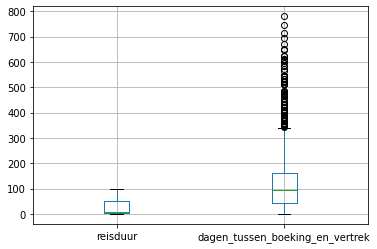

In [184]:
bestellingen.reisduur = bestellingen.reisduur.dt.days
bestellingen.dagen_tussen_boeking_en_vertrek = bestellingen.dagen_tussen_boeking_en_vertrek.dt.days

bestellingen.boxplot(column=['reisduur', 'dagen_tussen_boeking_en_vertrek'])

kwantielen_reisduur = bestellingen.reisduur.quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print(kwantielen_reisduur)

# Deelnemers data

In [185]:
deelnemers.head(10)
geef_procent_na(deelnemers)

Dossier           0.00
Vertrekdatum      0.20
Familienaam       0.00
Voornaam          0.08
Bestemming        0.80
Geboortedatum     7.49
Email            82.40
GSM              86.62
Straat + nr.     67.85
Postcode         67.85
Stad             67.69
dtype: float64

Bestemmingen lowercase maken om minder dubbele data te hebben.

In [186]:
print(len(deelnemers.Bestemming.unique()))
deelnemers.Bestemming = deelnemers.Bestemming.str.lower()
len(deelnemers.Bestemming.unique())

896


866

# Artikels data

In [187]:
artikels.head(10)
geef_procent_na(artikels)

Dos. nr.                  0.00
DossierStatus             0.00
Boekingsdatum             0.00
Vertrekdatum              0.55
Volledige naam klant      0.00
Bestemming                0.56
ArticlePoNummer         100.00
Artikelcode               7.46
Omschrijving              0.05
Artikelprijs              0.00
Totaal dossier            0.00
dtype: float64

Prijzen omvormen naar float voor berekeningen met te doen

In [188]:
artikels.Artikelprijs = artikels.Artikelprijs.str.replace('.', '').str.replace(',', '.').astype(float)
artikels['Totaal dossier'] = artikels['Totaal dossier'].str.replace('.', '').str.replace(',', '.').astype(float)

In [189]:
artikels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14442 entries, 0 to 14441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Dos. nr.              14442 non-null  int64  
 1   DossierStatus         14442 non-null  object 
 2   Boekingsdatum         14442 non-null  object 
 3   Vertrekdatum          14362 non-null  object 
 4   Volledige naam klant  14442 non-null  object 
 5   Bestemming            14361 non-null  object 
 6   ArticlePoNummer       0 non-null      float64
 7   Artikelcode           13364 non-null  object 
 8   Omschrijving          14435 non-null  object 
 9   Artikelprijs          14442 non-null  float64
 10  Totaal dossier        14442 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB


# Deel 2 van het project

# data samenvoegen

### artikels (extra manipluatie)

In [190]:
#unieke waarden met hun hoeveelheid tonen voor dossierstatus
artikels.groupby('DossierStatus')['Dos. nr.'].nunique()

#enkel artikels met status ok overhouden en zonder Totaal dossier 0
artikels = artikels.loc[artikels['DossierStatus'] == 'Ok']
artikels = artikels.loc[artikels['Totaal dossier'] != 0]

artikels.sort_values(['Dos. nr.'])

,Dos. nr.,DossierStatus,Boekingsdatum,Vertrekdatum,Volledige naam klant,Bestemming,ArticlePoNummer,Artikelcode,Omschrijving,Artikelprijs,Totaal dossier
3301,1,Ok,28.01.2011 15:01:35,10.07.2011 00:00:00,bf9c3e9473bd426c,Netherlands,NaN,NaN,OMSCHRIJVING,14.52,14.52
3302,2,Ok,06.04.2011 15:37:15,15.07.2011 00:00:00,5eca6c1e245c62a8,"Montpellier, Frankrijk",NaN,NaN,Simbo reisverzekering,42.00,1735.08
3303,2,Ok,06.04.2011 15:37:15,15.07.2011 00:00:00,5eca6c1e245c62a8,"Montpellier, Frankrijk",NaN,NaN,Poliskosten,5.00,1735.08
3304,2,Ok,06.04.2011 15:37:15,15.07.2011 00:00:00,5eca6c1e245c62a8,"Montpellier, Frankrijk",NaN,NaN,Simbo Garantie-Annuleringsverzekering incl. as...,116.58,1735.08
3305,2,Ok,06.04.2011 15:37:15,15.07.2011 00:00:00,5eca6c1e245c62a8,"Montpellier, Frankrijk",NaN,NaN,Dynamigo ( 10-13 en 13-16 jaar),745.00,1735.08
...,...,...,...,...,...,...,...,...,...,...,...
3293,20210064,Ok,22.05.2021 19:52:22,08.08.2021 00:00:00,fdeb5fe2864601ef,Frankrijk,NaN,185da99f34bf5b42,Week paardrijden jongvolwassenen,0.00,1020.00
3300,20210065,Ok,23.05.2021 16:02:09,08.08.2021 00:00:00,867d327463be25b7,Nederland,NaN,78899a2b9943112b,Paardrijden op het strand in Zeeland,0.00,760.00
3299,20210065,Ok,23.05.2021 16:02:09,08.08.2021 00:00:00,867d327463be25b7,Nederland,NaN,72dc0ce6c4ac298f,"Paardrijden op het strand in Zeeland, 11 uur p...",760.00,760.00
3297,20210067,Ok,23.05.2021 23:32:21,16.08.2021 00:00:00,d7a2e4b3b20009b9,België,NaN,2c70c4d71ecae7e4,Western paardrijden in de Ardennen: Midweek (a...,950.00,950.00


In [191]:
# merge1 = pd.merge(klanten, bestellingen, on='Klantnummer')
# merge2 = pd.merge(merge1, deelnemers, left_on="Dos. nr.", right_on="Dossier")
# totaal = pd.merge(merge2, artikels, on='Dos. nr.')
# totaal

# Dataframe klaarmaken om model op te trainen

### Bruikbare features uit de klanten tabel selecteren

In [192]:
klanten_features = klanten[["Klantnummer", "Land"]]

klanten_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280 entries, 0 to 3279
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Klantnummer  3280 non-null   object
 1   Land         3280 non-null   object
dtypes: object(2)
memory usage: 51.4+ KB


### Artikels en deelnemers in de bestellingen tabel mergen

#### 1.   bestellingen en deelnemers samenvoegen


In [193]:
deelnemers_grouped = deelnemers.value_counts('Dossier').to_frame()
deelnemers_grouped.rename(columns={"Dossier" : 'Dos. nr', "0" : "Aantal_personen"}, inplace=True)

bestellingen_deelnemers = bestellingen.merge(deelnemers_grouped, how='left', left_on='Dos. nr.', right_on='Dossier')
bestellingen_deelnemers.rename(columns={0: 'aantal_deelnemers'}, inplace=True)

# alle rijen weglaten waar er geen deelnemers zijn
bestellingen_deelnemers.dropna(subset = ["aantal_deelnemers"], inplace=True)
bestellingen_deelnemers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 1 to 3146
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            2828 non-null   int64         
 1   Status                           2828 non-null   int64         
 2   Dos. jaar                        2828 non-null   int64         
 3   Dos. nr.                         2828 non-null   int64         
 4   Email                            2814 non-null   object        
 5   Klantnummer                      2828 non-null   object        
 6   Klantnummer CMS                  1710 non-null   object        
 7   Datum creatie                    2828 non-null   datetime64[ns]
 8   D. vertrek                       2828 non-null   datetime64[ns]
 9   Datum terug                      2828 non-null   datetime64[ns]
 10  Totaalprijs                      2828 non-null   object     

#### 2.   Bestellingen_deelnemers samenvoegen met artikels

In [194]:
# Berekenen van min, gemiddeld, mediaan, max som en aantal prijs per dossier
artikels_grouped = artikels.groupby('Dos. nr.').agg({'Artikelprijs' : ['min', 'mean', 'median', 'max', 'sum', 'count']})
artikels_grouped.columns = artikels_grouped.columns.map('_'.join)

bestellingen_deelnemers_artikels = bestellingen_deelnemers.merge(artikels_grouped, how='left', left_on='Dos. nr.', right_index=True)
bestellingen_deelnemers_artikels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2828 entries, 1 to 3146
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            2828 non-null   int64         
 1   Status                           2828 non-null   int64         
 2   Dos. jaar                        2828 non-null   int64         
 3   Dos. nr.                         2828 non-null   int64         
 4   Email                            2814 non-null   object        
 5   Klantnummer                      2828 non-null   object        
 6   Klantnummer CMS                  1710 non-null   object        
 7   Datum creatie                    2828 non-null   datetime64[ns]
 8   D. vertrek                       2828 non-null   datetime64[ns]
 9   Datum terug                      2828 non-null   datetime64[ns]
 10  Totaalprijs                      2828 non-null   object     

#### 3.   Tabel maken met features om modellen met op te stellen

In [224]:
bestellingen_deelnemers_artikels = bestellingen_deelnemers_artikels[['Dos. jaar', 'Klantnummer', 'Totaalprijs', 'reisduur', 'dagen_tussen_boeking_en_vertrek', 'aantal_deelnemers', 'Artikelprijs_min', 'Artikelprijs_mean', 'Artikelprijs_median', 'Artikelprijs_max', 'Artikelprijs_sum', 'Artikelprijs_count']]

# Totaalprijs wijzigen van object naar float
bestellingen_deelnemers_artikels.Totaalprijs.replace(',', '.',regex=True, inplace=True)
bestellingen_deelnemers_artikels.Totaalprijs = bestellingen_deelnemers_artikels.Totaalprijs.astype(float)

bestellingen_deelnemers_artikels.aantal_deelnemers = bestellingen_deelnemers_artikels.aantal_deelnemers.astype(int)

# Wanneer geen deelnemers maak aantal 1 voor de persoon die de bestelling plaats
bestellingen_deelnemers_artikels.Artikelprijs_count.fillna(1, inplace=True)
bestellingen_deelnemers_artikels.Artikelprijs_count = bestellingen_deelnemers_artikels.Artikelprijs_count.astype(int)

# Artikelprijzen nul maken wanneer er geen artikels zijn
bestellingen_deelnemers_artikels.fillna(0, inplace=True)

bestellingen_deelnemers_artikels

bestellingen_deelnemers_artikels_grouped = bestellingen_deelnemers_artikels.groupby(by='Klantnummer').agg({'Dos. jaar' : ['min', 'mean', 'median', 'max', 'count'], 'Totaalprijs' : ['min', 'mean', 'median', 'max', 'sum'], 'reisduur': ['min', 'mean', 'median', 'max', 'sum'], 'dagen_tussen_boeking_en_vertrek' : 'mean', 'aantal_deelnemers' : ['min', 'mean', 'median', 'max', 'sum'], 'Artikelprijs_min' : 'min', 'Artikelprijs_mean': 'mean', 'Artikelprijs_median' : 'median', 'Artikelprijs_max' : 'max', 'Artikelprijs_sum' : 'sum', 'Artikelprijs_count' : ['min', 'max', 'median', 'count']})
# tuple omvormen naar string
bestellingen_deelnemers_artikels_grouped.columns = bestellingen_deelnemers_artikels_grouped.columns.map('_'.join)

# Alle features duidelijke consistente naamgeving geven
features = bestellingen_deelnemers_artikels_grouped.rename(columns={'Dos. jaar_min' : 'min_dos_jaar', 'Dos. jaar_mean' : 'gem_dos_jaar', 'Dos. jaar_median' : 'med_dos_jaar', 'Dos. jaar_max' : 'max_dos_jaar', 'Dos. jaar_count' : 'aantal_best_dos_jaar', 'Totaalprijs_min' : 'min_totaalprijs', 'Totaalprijs_mean' : 'gem_totaalprijs', 'Totaalprijs_median' : 'med_totaalprijs', 'Totaalprijs_max' : 'max_totaalprijs', 'Totaalprijs_sum' : 'som_totaalprijs', 'reisduur_min' : 'min_reisduur', 'reisduur_mean' : 'gem_reisduur', 'reisduur_median' : 'med_reisduur', 'reisduur_max' : 'max_reisduur', 'reisduur_sum' : 'som_reisduur', 'dagen_tussen_boeking_en_vertrek_mean' : 'gem_dagen_boeking_tot_vertrek', 'aantal_deelnemers_min' : 'min_deelnemers', 'aantal_deelnemers_mean' : 'gem_deelnemers', 'aantal_deelnemers_median' : 'med_deelnemers', 'aantal_deelnemers_max' : 'max_deelnemers', 'aantal_deelnemers_sum' : 'som_deelnemers', 'Artikelprijs_min_min' : 'min_artikelprijs', 'Artikelprijs_mean_mean	' : 'gem_artikelprijs', 'Artikelprijs_median_median' : 'med_artikelprijs', 'Artikelprijs_max_max' : 'max_artikelprijs', 'Artikelprijs_sum_sum' : 'som_artikelprijs', 'Artikelprijs_count_min' : 'min_artikels', 'Artikelprijs_count_max' : 'max_artikels', 'Artikelprijs_count_median' : 'median_artikels', 'Artikelprijs_count_count' : 'count_artikels'})

features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2264 entries, 000afb96ded6677c to fff455057ad492da
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   min_dos_jaar                   2264 non-null   int64  
 1   gem_dos_jaar                   2264 non-null   float64
 2   med_dos_jaar                   2264 non-null   float64
 3   max_dos_jaar                   2264 non-null   int64  
 4   aantal_best_dos_jaar           2264 non-null   int64  
 5   min_totaalprijs                2264 non-null   float64
 6   gem_totaalprijs                2264 non-null   float64
 7   med_totaalprijs                2264 non-null   float64
 8   max_totaalprijs                2264 non-null   float64
 9   som_totaalprijs                2264 non-null   float64
 10  min_reisduur                   2264 non-null   int64  
 11  gem_reisduur                   2264 non-null   float64
 12  med_reisduur              

#### Samengevoegde bestellingentabel groupen NIET MEER NODIG !!!!

In [196]:
# bestellingen_grouped = bestellingen.groupby('Klantnummer').agg({'reisduur' : ['min', 'mean', 'median', 'max', 'sum', 'count'], 'dagen_tussen_boeking_en_vertrek' : ['min', 'mean', 'median', 'max', 'sum', 'count'] })

# # tuples in header omvormen naar string
# bestellingen_grouped.columns = bestellingen_grouped.columns.map('_'.join)
# bestellingen_grouped

,reisduur_min,reisduur_mean,reisduur_median,reisduur_max,reisduur_sum,reisduur_count,dagen_tussen_boeking_en_vertrek_min,dagen_tussen_boeking_en_vertrek_mean,dagen_tussen_boeking_en_vertrek_median,dagen_tussen_boeking_en_vertrek_max,dagen_tussen_boeking_en_vertrek_sum,dagen_tussen_boeking_en_vertrek_count
Klantnummer,,,,,,,,,,,,
000afb96ded6677c,4,18.75,9.5,52,75,4,27,104.25,83.0,224,417,4
00231b47f2fe7ac7,45,45.00,45.0,45,45,1,117,117.00,117.0,117,117,1
0028a5e846e724ba,6,6.00,6.0,6,6,1,12,12.00,12.0,12,12,1
002cb084e5557a83,5,5.00,5.0,5,5,1,226,226.00,226.0,226,226,1
004f36b1fa26a5d9,66,66.00,66.0,66,66,1,105,105.00,105.0,105,105,1
...,...,...,...,...,...,...,...,...,...,...,...,...
ff81da576dfded5d,2,2.00,2.0,2,2,1,60,60.00,60.0,60,60,1
ffc0a5725766e698,2,2.00,2.0,2,2,1,202,202.00,202.0,202,202,1
ffd4a6d11c32412a,52,52.00,52.0,52,52,1,66,66.00,66.0,66,66,1


In [197]:
# Berekenen van min, gemiddeld, mediaan, max som en aantal prijs per dossier
artikels_grouped = artikels.groupby('Dos. nr.').agg({'Artikelprijs' : ['min', 'mean', 'median', 'max', 'sum', 'count']})

artikels_grouped.columns = artikels_grouped.columns.map('_'.join)
artikels_grouped

,Artikelprijs_min,Artikelprijs_mean,Artikelprijs_median,Artikelprijs_max,Artikelprijs_sum,Artikelprijs_count
Dos. nr.,,,,,,
1,14.52,14.520000,14.52,14.52,14.52,1
2,5.00,285.430000,87.79,745.00,1712.58,6
3,30.00,310.000000,310.00,590.00,620.00,2
4,250.00,810.000000,810.00,1370.00,1620.00,2
5,-50.00,100.037143,17.50,645.00,700.26,7
...,...,...,...,...,...,...
20210062,0.00,324.624000,84.62,1445.00,1623.12,5
20210063,0.00,167.500000,167.50,335.00,335.00,2
20210064,0.00,340.000000,0.00,1020.00,1020.00,3


In [198]:
deelnemers_grouped = deelnemers.value_counts('Dossier')
deelnemers_grouped
# deelnemers

Dossier
20190494    15
4000        14
2340        13
1168        13
2290        12
            ..
1992         1
3819         1
1990         1
3820         1
1            1
Length: 4343, dtype: int64

### Artikels en deelnemers in de bestellingen table mergen

In [199]:
# klanten_bestellingen = klanten_features.merge(bestellingen_grouped, how='left', on='Klantnummer')
# klanten_bestellingen_artikels = klanten_bestellingen.merge(artikels_grouped, how='left')

# klanten_bestellingen


# bestellingen.sort_values('Klantnummer', inplace=True)
# grouped_bestellingen = bestellingen.groupby(['Klantnummer'])['Klantnummer'].count().reset_index(name='count').sort_values(['Klantnummer'])
# grouped = klanten.groupby(['Land'])['Land'].count().reset_index(name='count').sort_values(['count'])

# display(klanten.head())
# display(bestellingen.head())
# display(grouped_bestellingen.head(100))
# display(deelnemers.head())
# display(artikels.head())